## FIR FILTERS


---



Two classes of digital filters are *Finite Impulse Response* (FIR) and *Infinite Impulse Response* (IIR).

The term ‘Impulse Response’ refers to the appearance of the filter in the time domain. Filters typically have broad frequency responses, which correspond to short duration pulses in the time domain as shown

![](.\img1\fireq.jpg)






The series are:

- Series x(n) - The input time history is x(0), x(1), x(2),..... to x(n). Lower case n is the total number of data points in the input time history.


- Series a(k) - The filter is represented by the series labelled “a” for a FIR filter, and “a” and “b” for an IIR filter. Uppercase letters N and P are the number of terms in the filters respectively, which is also referred to as the filter “order” or “number of taps”. For example, the FIR filter is performed from k=0 to k=N.


- Series y(n) - Output time history is y(0), y(1), y(2), …



##### FIR  filter design involves four steps:


- **STEP 1 :** Determining specifications

First, we need to determine what specifications are required. This step completely depends on the application. In the example of X Hertz noise on the output of the sensor, we need to know how strong the noise component is relative to the desired signal and how much we need to suppress the noise. This information is necessary to find the filter with minimum order for this application.So this step entirely depends upon the required application.

- **STEP 2 :** Finding a transfer function
With design specifications known, we need to find a transfer function which will provide the required filtering. The rational transfer function of a digital filter .This step calculates the coefficients,ak and bk.

$H(z)=\frac{\sum_{k=0}^{M-1}b_{k}z^{-k}}{\sum_{k=0}^{N-1}a_{k}z^{-k}}$

- **STEP 3 :** Choosing a realization structure

 
H(z) is known, we should choose the realization structure. In other words, there are many systems which can give the obtained transfer function and we must choose the appropriate one. For example, any of the direct form I, II, cascade, parallel, transposed, or lattice forms can be used to realize a particular transfer function. The main difference between the aforementioned realization structures is their sensitivity to using a finite length of bits. Note that in the final digital system, we will use a finite length of bits to represent a signal or a filter coefficient. Some realizations, such as direct forms, are very sensitive to quantization of the coefficients. However, cascade and parallel structures show smaller sensitivity and are preferred.

- **STEP 4 :** Implementing the filter

After deciding on what realization structure to use, we should implement the filter. You have a couple of options for this step: a software implementation (such as a MATLAB , C ,Python Programming) or a hardware implementation (such as a DSP, a microcontroller like ESP32 ).






--- 


### Moving average filter

The moving average filter is a simple Low Pass FIR (Finite Impulse Response) filter commonly used for smoothing an array of sampled data/signal.It is the most common filter in DSP, mainly because it is the easiest digital
filter to understand and use. In spite of its simplicity, the moving average filter is optimal for
a common task: It takes L samples of input at a time and takes the average of those L-samples and produces a single output point. It is a very simple LPF (Low Pass Filter) structure that comes handy for scientists and engineers to filter unwanted noisy component from the intended data.

As the filter length increases (the parameter L) the smoothness of the output increases, whereas the sharp transitions in the data are made increasingly blunt. This implies that this filter has excellent time domain response but a poor frequency response.
- Reducing random noise while retaining a sharp step response. This makes it the premier filter for time domain encoded signals. 
- The moving average is the worst filter for frequency domain encoded signals, with little ability to separate one band of frequencies from another. 

Relatives of the Moving average filter include the 
- Gaussian 
- Blackman
- Multiplepass moving average. 

These have slightly better performance in the frequency domain, at the expense of increased computation time



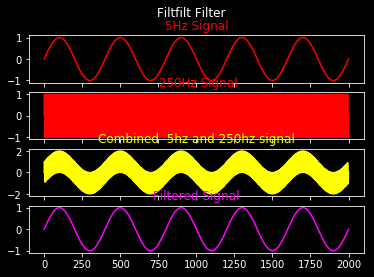

In [2]:
from matplotlib import pyplot as plt
import mysignals as sigs
from scipy import signal
from matplotlib import style
import numpy as np



t = np.linspace(0,1.0,2001)

sig_5hz = np.sin(2*np.pi*5*t)
sig_250hz = np.sin(2*np.pi*250*t)

sig_5hz_250hz = sig_5hz + sig_250hz


b,a = signal.butter(8,0.125)
filtered_signal = signal.filtfilt(b,a,sig_5hz_250hz, padlen=150)




style.use('dark_background')

f, plt_arr =plt.subplots(4,sharex=True)
f.suptitle('Filtfilt Filter')

plt_arr[0].plot(sig_5hz,color='red')
plt_arr[0].set_title("5Hz Signal", color ='red')

plt_arr[1].plot(sig_250hz,color='red')
plt_arr[1].set_title(" 250Hz Signal", color ='red')

plt_arr[2].plot(sig_5hz_250hz,color='yellow')
plt_arr[2].set_title("Combined  5hz and 250hz signal", color ='yellow')

plt_arr[3].plot(filtered_signal,color='magenta')
plt_arr[3].set_title("Filtered Signal", color ='magenta')
plt.show()



## All types of FIR filter realizations for a given signal 

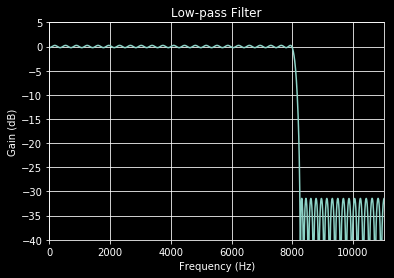

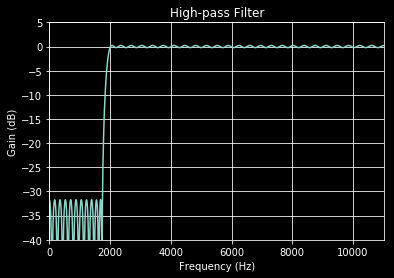

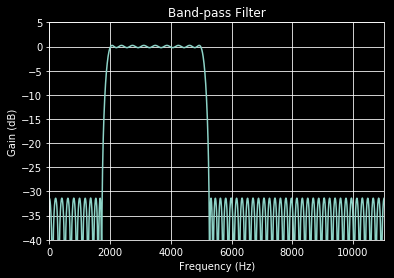

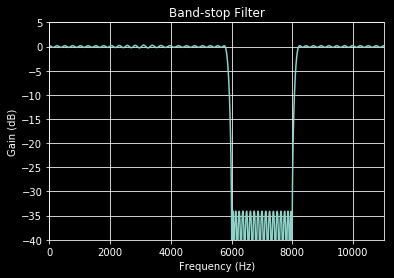

In [4]:
from __future__ import division, print_function

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# A common Function which has been written to plot the output of each filter 
def plot_response(fs, w, h, title):
    plt.figure()
    plt.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))
    plt.ylim(-40, 5)
    plt.xlim(0, 0.5*fs)
    plt.grid(True)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain (dB)')
    plt.title(title)


# Low-pass filter design parameters
fs = 22050.0       # Sample rate, Hz
cutoff = 8000.0    # Desired cutoff frequency, Hz
trans_width = 250  # Width of transition from pass band to stop band, Hz
numtaps = 125      # Size of the FIR filter.
taps = signal.remez(numtaps, [0, cutoff, cutoff + trans_width, 0.5*fs],[1, 0], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)
plot_response(fs, w, h, "Low-pass Filter")

# High-pass filter design parameters
fs = 22050.0       # Sample rate, Hz
cutoff = 2000.0    # Desired cutoff frequency, Hz
trans_width = 250  # Width of transition from pass band to stop band, Hz
numtaps = 125      # Size of the FIR filter.

taps = signal.remez(numtaps, [0, cutoff - trans_width, cutoff, 0.5*fs],[0, 1], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)
plot_response(fs, w, h, "High-pass Filter")

# Band-pass filter design parameters
fs = 22050.0         # Sample rate, Hz
band = [2000, 5000]  # Desired pass band, Hz
trans_width = 260    # Width of transition from pass band to stop band, Hz
numtaps = 125        # Size of the FIR filter.
edges = [0, band[0] - trans_width,band[0], band[1],band[1] + trans_width, 0.5*fs]
taps = signal.remez(numtaps, edges, [0, 1, 0], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)
plot_response(fs, w, h, "Band-pass Filter")


# Band-stop filter design parameters
fs = 22050.0         # Sample rate, Hz
band = [6000, 8000]  # Desired stop band, Hz
trans_width = 200    # Width of transition from pass band to stop band, Hz
numtaps = 175        # Size of the FIR filter.
edges = [0, band[0] - trans_width,band[0], band[1],band[1] + trans_width, 0.5*fs]
taps = signal.remez(numtaps, edges, [1, 0, 1], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)
plot_response(fs, w, h, "Band-stop Filter")

plt.show()

### Median filter 

The Median Filter is a non-linear digital filtering technique, often used to remove noise from an image or signal. Such noise reduction is a typical pre-processing step to improve the results of later processing. Median filtering is very widely used in digital image processing because, under certain conditions, it preserves edges while removing noise , also having applications in signal processing.

The main idea of the median filter is to run through the signal entry by entry, replacing each entry with the median of neighboring entries. The pattern of neighbors is called the "window", which slides, entry by entry, over the entire signal. For 1D signals, the most obvious window is just the first few preceding and following entries, whereas for 2D or higher-dimensional data the window must include all entries within a given radius or predefined region

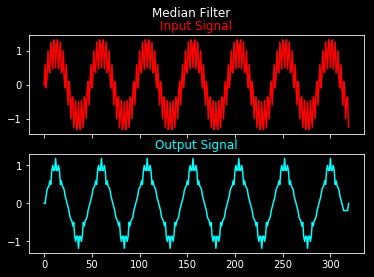

In [1]:
from matplotlib import pyplot as plt
import mysignals as sigs
from scipy import signal
from matplotlib import style



#This is a built in function which provide the filtered output 
median_filter_output = signal.medfilt(sigs.InputSignal_1kHz_15kHz,11)

style.use('dark_background')

f, plt_arr =plt.subplots(2,sharex=True)
f.suptitle('Median Filter')

plt_arr[0].plot(sigs.InputSignal_1kHz_15kHz,color='red')
plt_arr[0].set_title("Input Signal", color ='red')

plt_arr[1].plot(median_filter_output,color='cyan')
plt_arr[1].set_title("Output Signal", color ='cyan')

plt.show()
